# Tutorial
After setting up an environment and run the `deepsas_v1.py` using the example data:

```bash
nohup uv run python -u deepsas_v1.py --output_dir ./outputs --exp_name example --device_index 0 --retrain > ./example.log 2>&1 &
```
The path of output results is:

```
./outputs/example
```

Then generate 3 tables of SnGs:

```bash
uv run python -u generate_3tables.py --output_dir ./outputs --exp_name example --device_index 0
```

The path of those 3 tables is:

```
./outputs/example/Senescent_Tables
```


Now the mian program of DeepSAS is end. Here is the code for downstream analysis. 

**Please note that the default input of DeepSAS is the h5ad file, the default cell type information is stored in `clusters`.**

## UMAP plot of raw data

In [11]:
import scanpy as sp
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import random
import numpy as np
import umap
import os
import datetime
import torch

from plot_figure import generate_umap,\
                        generate_umap_snc,\
                        bar_plot_condition,\
                        bar_plot_location,\
                        bar_plot_age,\
                        generate_heatmap,\
                        create_summary_table,\
                        preprocess_plot,\
                        load_snc_info,\
                        generate_heatmap_snc


In [ ]:
exp_name="example"
output_path="./outputs"
raw_data_path=os.path.join(output_path,f"{exp_name}/{exp_name}_new_data.h5ad")
snc_path=os.path.join(output_path,f'{exp_name}/{exp_name}_sencellgene-epoch{4}.data')
raw_adata=sp.read_h5ad(raw_data_path)

In [3]:
adata_umap=preprocess_plot(raw_adata)

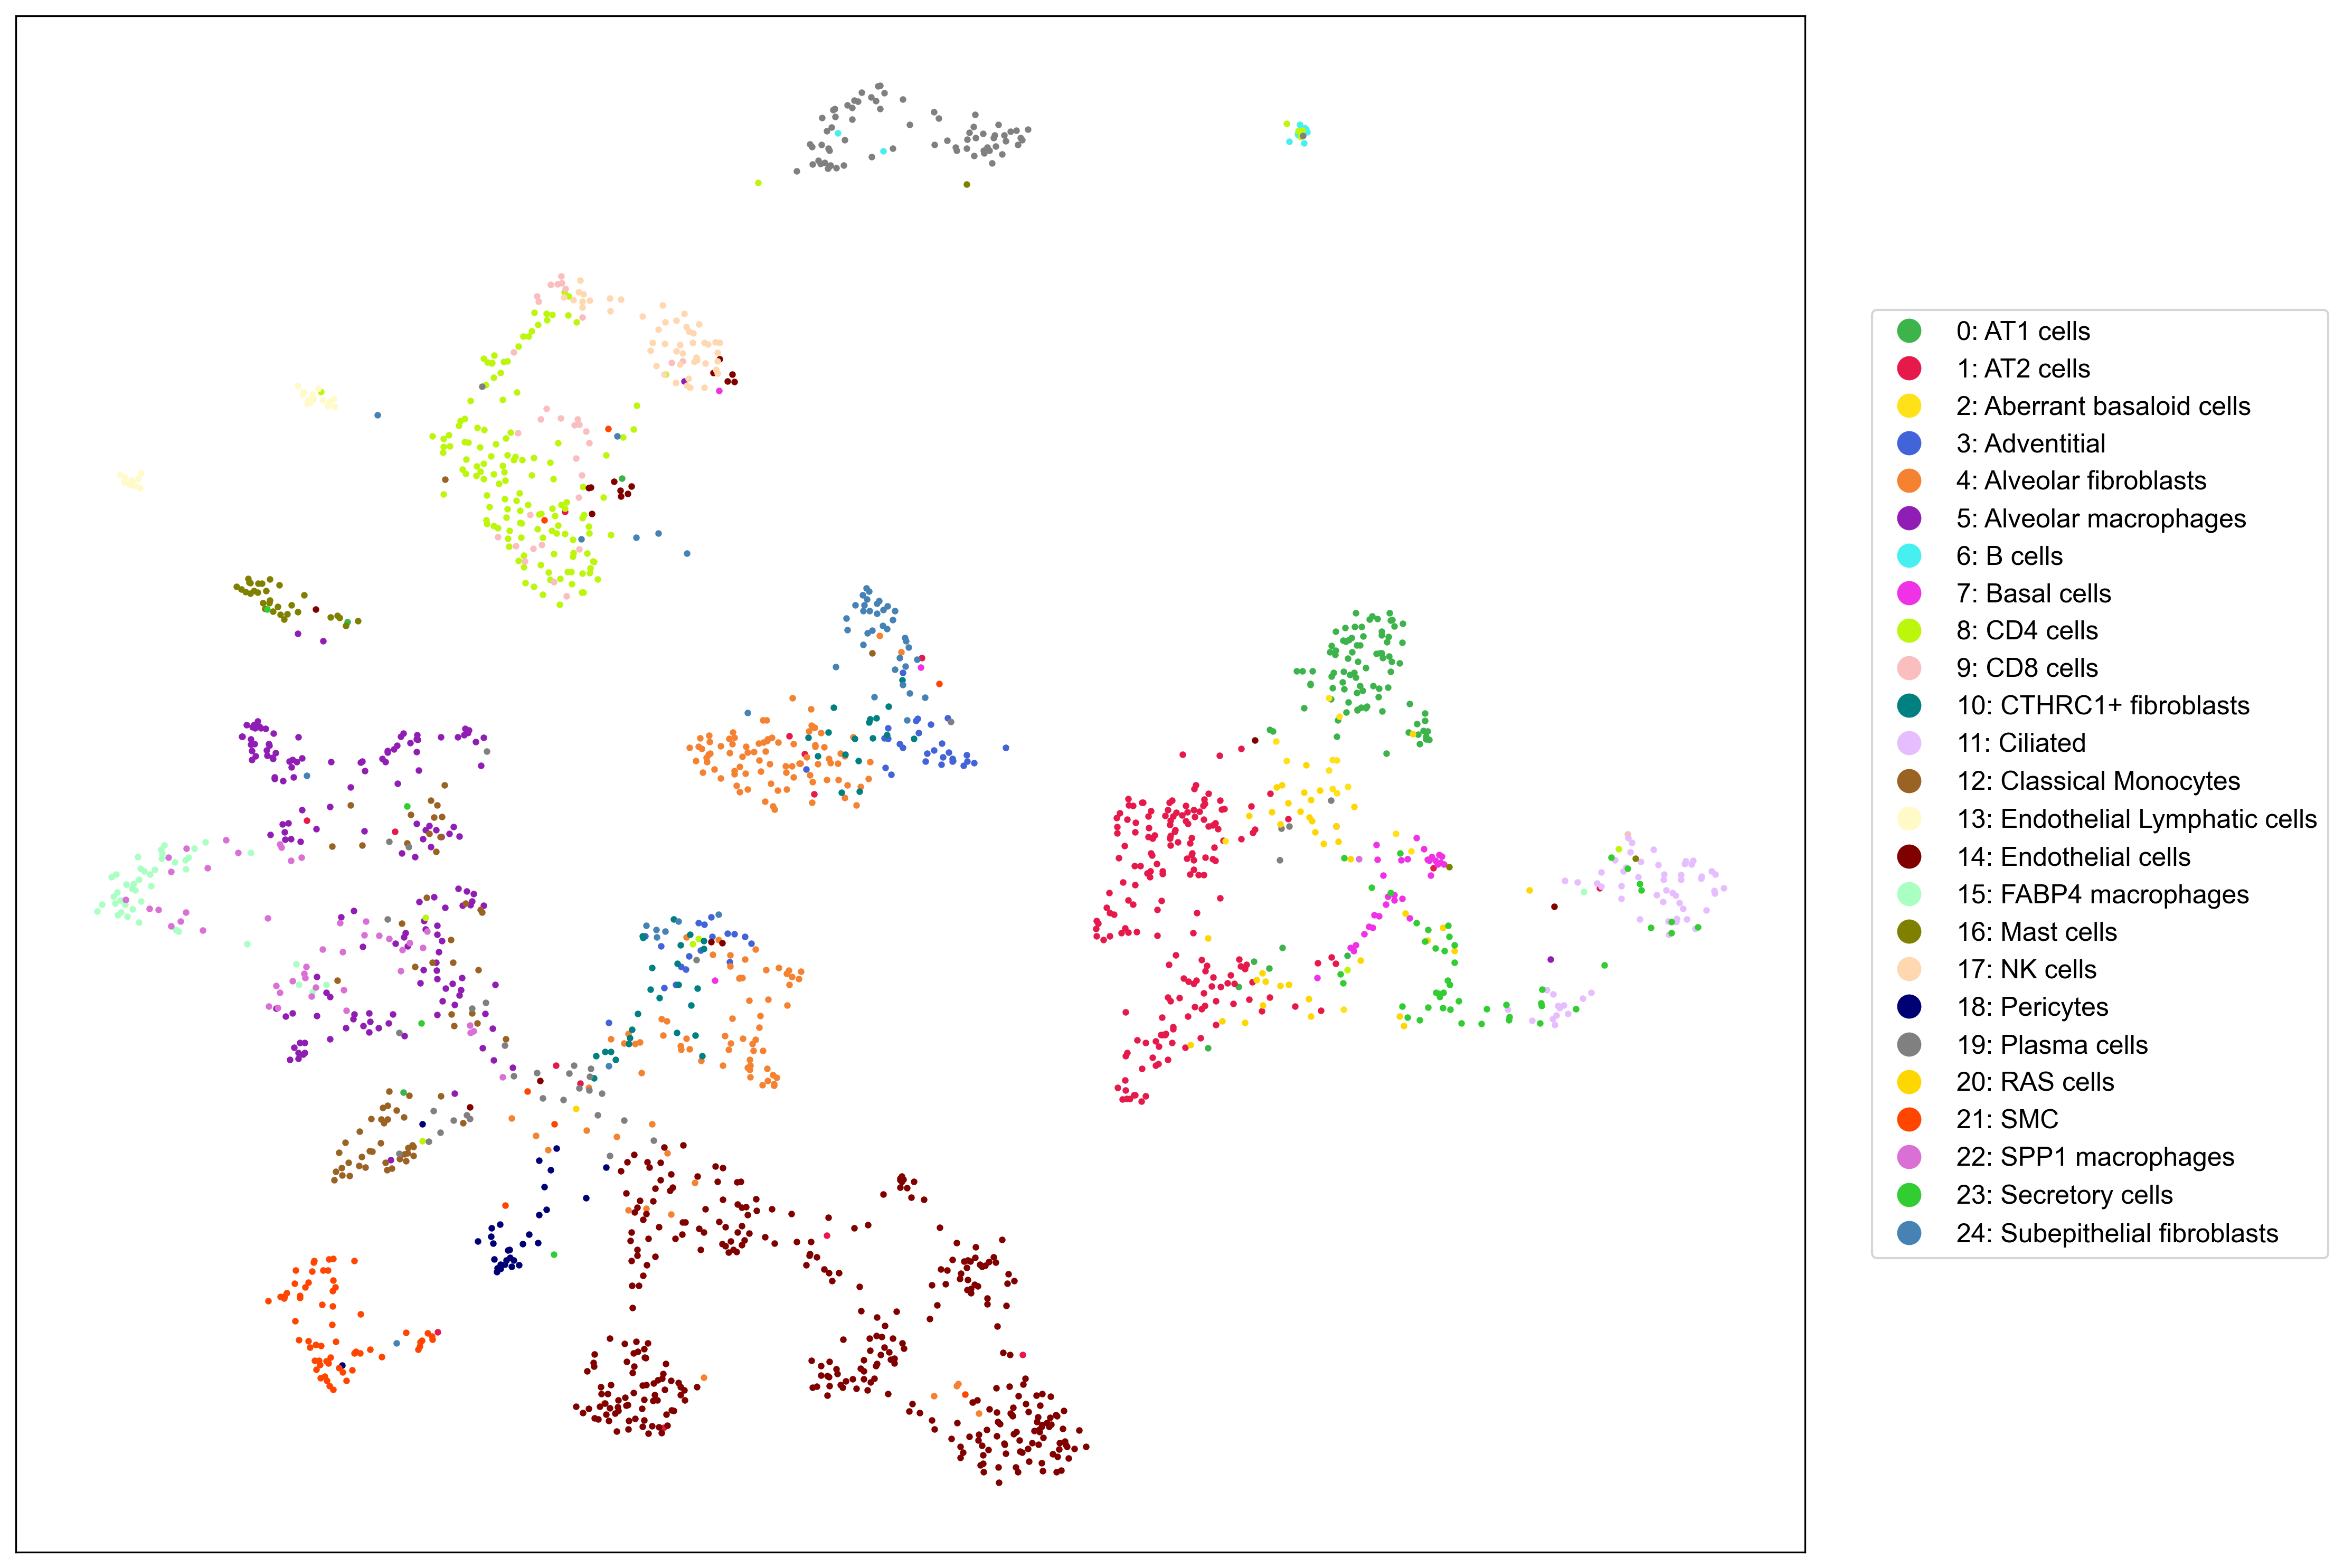

In [4]:
generate_umap(adata_umap, 'clusters')

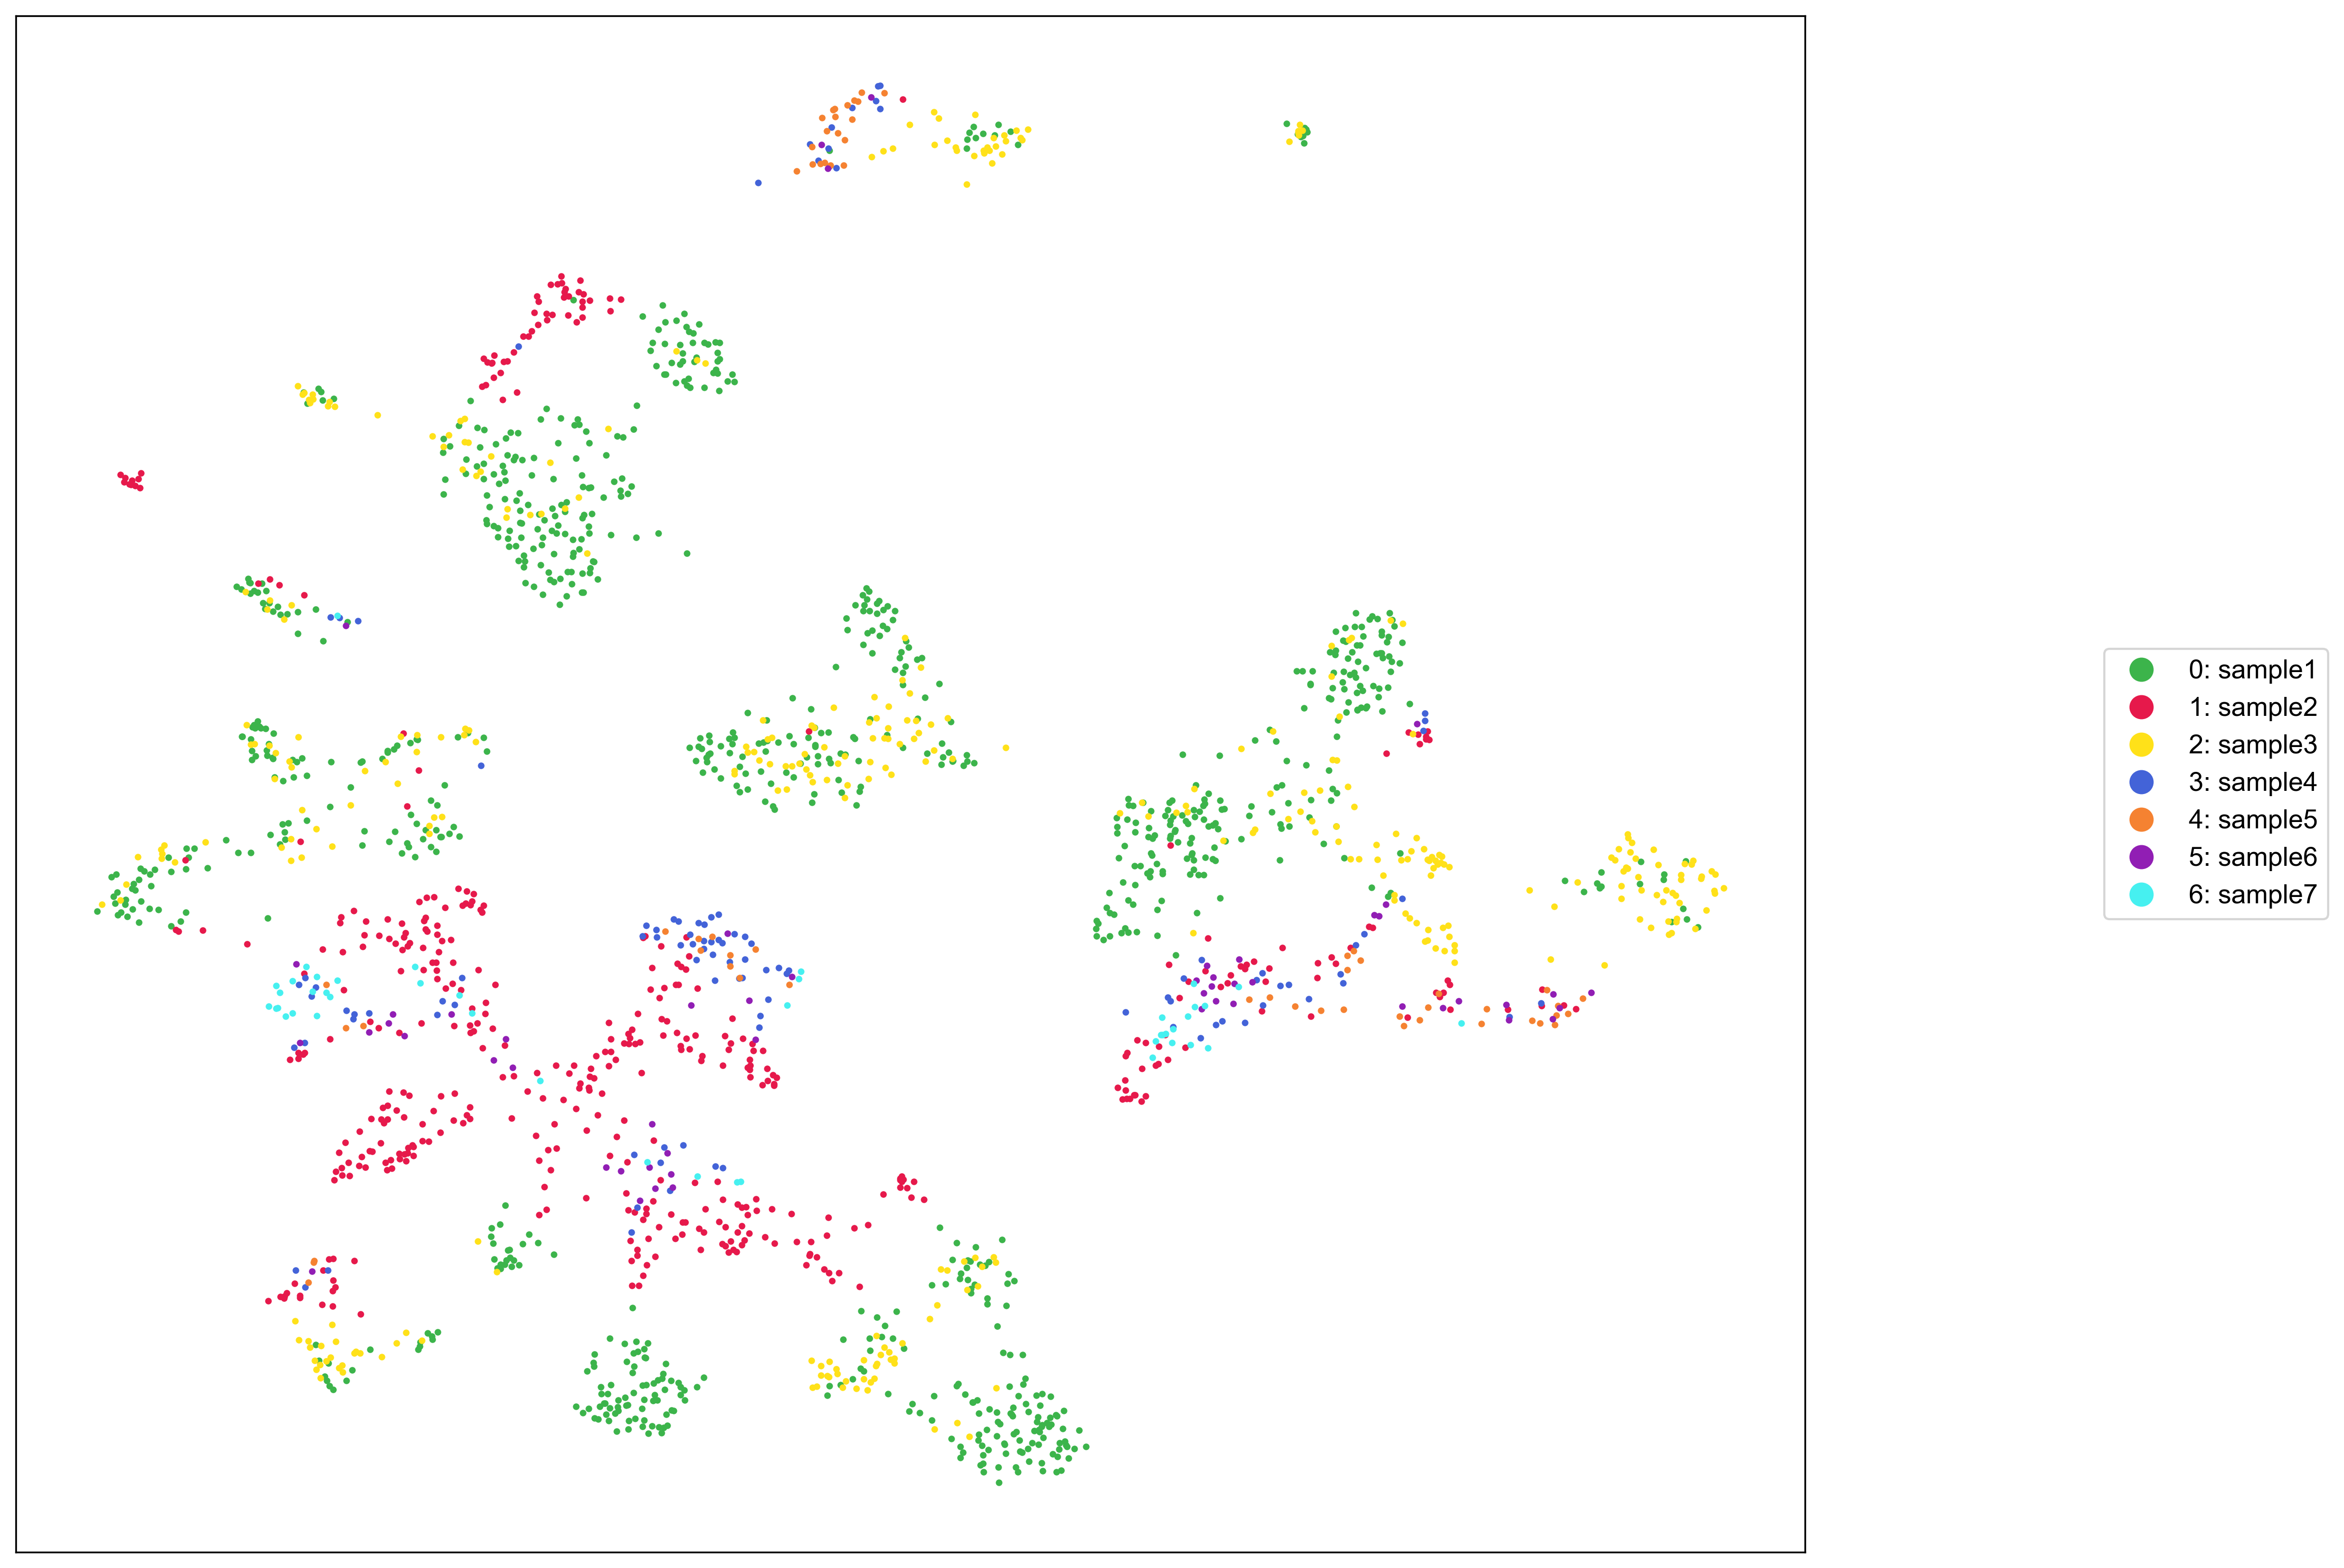

In [5]:
generate_umap(adata_umap, 'Sample')

## SnC analysis

In [6]:
adata_snc,sub_sencells=load_snc_info(raw_adata,snc_path,threshold=1)

/bmbl_data/chenghao/sencell/test_deepsas/sencell/plot_figure.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sencell_dict,sen_gene_ls,attention_scores,edge_index_selfl

snc in different cell types:  Counter({'Endothelial cells': 18, 'Alveolar fibroblasts': 14})
Number of SnC: 32


Status                Healthy  IPF
clusters                          
Alveolar fibroblasts        6    8
Endothelial cells           2   16


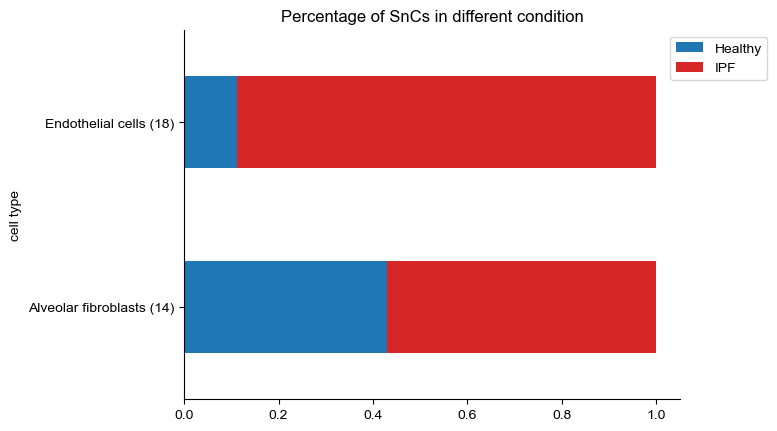

Area                  Lower Lobe  Parenchyma  Upper Lobe
clusters                                                
Alveolar fibroblasts           7           6           1
Endothelial cells              8           2           8


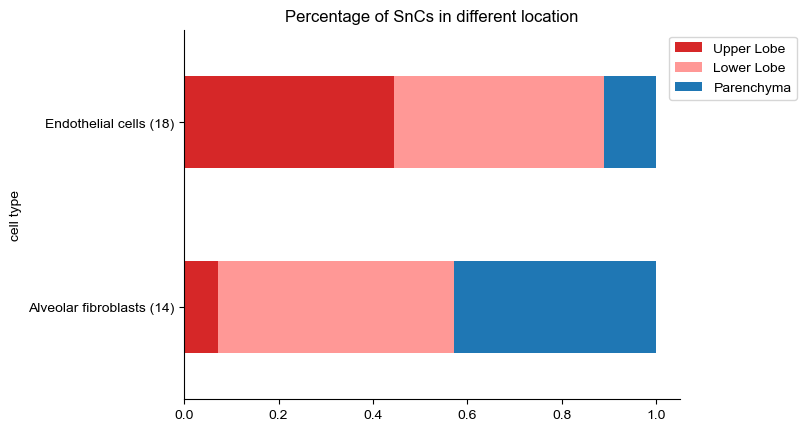

In [7]:
bar_plot_condition(sub_sencells)
bar_plot_location(sub_sencells)

In [8]:
final_table=create_summary_table(adata_snc)
final_table

,CT,# cell,# IPF non-SnC,# IPF SnC,IPF SnC%,# Healthy non-SnC,# Healthy SnC,Healthy SnC%,# UL non-SnC,# UL SnC,...,LL SnC%,# Parenchyma non-SnC,# Parenchyma SnC,Parenchyma SnC%,# Young non-SnC,# Young SnC,Young SnC%,# Old non-SnC,# Old SnC,Old SnC%
0,Plasma cells,108,76,0,0.000000,32,0,0.000000,37,0,...,0.000000,32,0,0.000000,0,0,0.0,108,0,0.000000
1,Subepithelial fibroblasts,51,50,0,0.000000,1,0,0.000000,11,0,...,0.000000,1,0,0.000000,0,0,0.0,51,0,0.000000
2,Alveolar fibroblasts,165,102,8,7.272727,49,6,10.909091,38,1,...,9.859155,49,6,10.909091,3,0,0.0,148,14,8.641975
3,CTHRC1+ fibroblasts,43,23,0,0.000000,20,0,0.000000,13,0,...,0.000000,20,0,0.000000,0,0,0.0,43,0,0.000000
4,AT1 cells,98,83,0,0.000000,15,0,0.000000,10,0,...,0.000000,15,0,0.000000,2,0,0.0,96,0,0.000000
5,AT2 cells,200,138,0,0.000000,62,0,0.000000,24,0,...,0.000000,62,0,0.000000,12,0,0.0,188,0,0.000000
6,FABP4 macrophages,45,39,0,0.000000,6,0,0.000000,11,0,...,0.000000,6,0,0.000000,1,0,0.0,44,0,0.000000
7,Endothelial cells,361,257,16,5.860806,86,2,2.272727,47,8,...,3.669725,86,2,2.272727,5,0,0.0,338,18,5.056180
8,SMC,69,48,0,0.000000,21,0,0.000000,25,0,...,0.000000,21,0,0.000000,0,0,0.0,69,0,0.000000
9,CD8 cells,33,24,0,0.000000,9,0,0.000000,3,0,...,0.000000,9,0,0.000000,0,0,0.0,33,0,0.000000


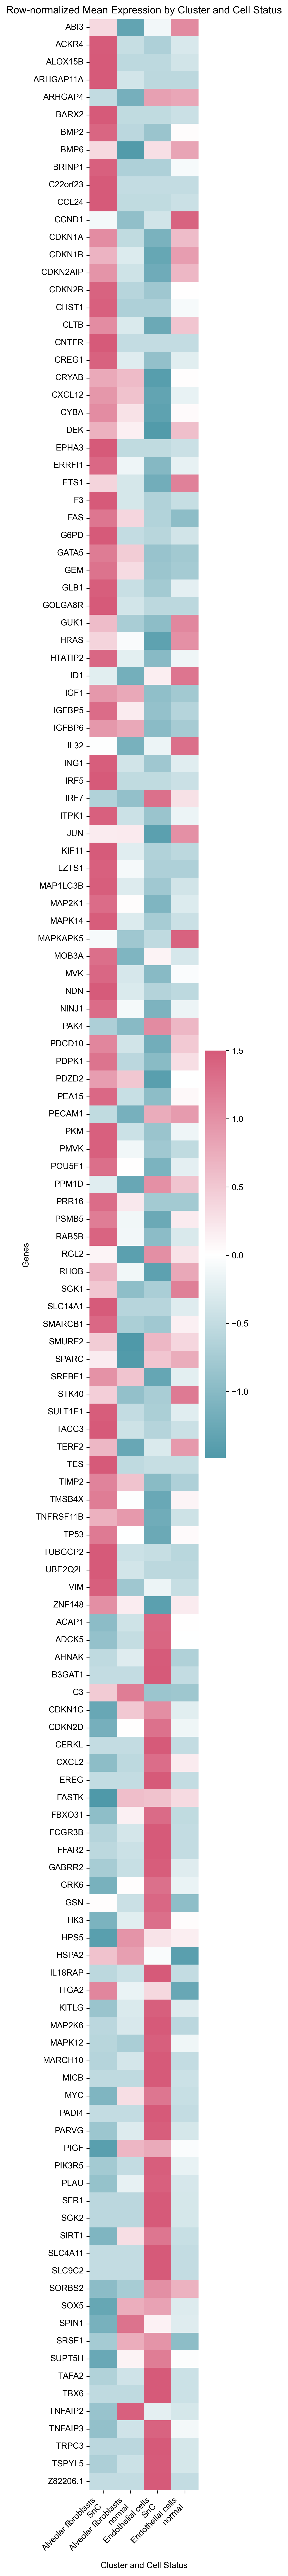

In [14]:
table3_path=os.path.join(output_path,f"{exp_name}/Senescent_Tables/Gene_newTable3_gene_ct_count.csv")
generate_heatmap_snc(adata_snc,
                     table3_path=table3_path,
                     z_score=True)